# Imports and Setup

In [20]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-07-01 04:09:06,442: Credentials are already in use. The existing account in the session will be replaced.


In [21]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

# Functions to Generate the Required Circuits

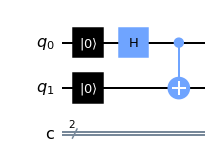

In [22]:
def phiplus():
    '''Function which returns circuit to create and measure phiplus = |00> + |11>'''
    qreg_q = QuantumRegister(2, 'q')
    creg_c = ClassicalRegister(2, 'c')
    circuit = QuantumCircuit(qreg_q, creg_c)

    circuit.reset(qreg_q[0])
    circuit.reset(qreg_q[1])
    circuit.h(qreg_q[0])
    circuit.cx(qreg_q[0], qreg_q[1])
#     circuit.measure(qreg_q,creg_c)
    return circuit

phiplus().draw('mpl')

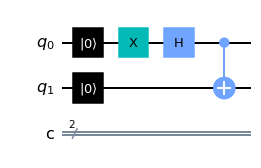

In [23]:
def phiminus():
    '''Function which returns circuit to create and measure phiminus = |00> - |11>'''
    qreg_q = QuantumRegister(2, 'q')
    creg_c = ClassicalRegister(2, 'c')
    circuit = QuantumCircuit(qreg_q, creg_c)

    circuit.reset(qreg_q[0])
    circuit.reset(qreg_q[1])
    circuit.x(qreg_q[0])
    circuit.h(qreg_q[0])
    circuit.cx(qreg_q[0], qreg_q[1])
#     circuit.measure(qreg_q,creg_c)
    return circuit
phiminus().draw('mpl')

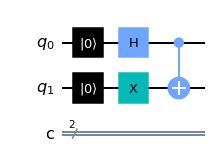

In [24]:
def psiplus():
    '''Function which returns circuit to create and measure psiplus = |01> + |10>'''
    qreg_q = QuantumRegister(2, 'q')
    creg_c = ClassicalRegister(2, 'c')
    circuit = QuantumCircuit(qreg_q, creg_c)

    circuit.reset(qreg_q[0])
    circuit.reset(qreg_q[1])
    circuit.h(qreg_q[0])
    circuit.x(qreg_q[1])
    circuit.cx(qreg_q[0], qreg_q[1])
#     circuit.measure(qreg_q,creg_c)
    return circuit
psiplus().draw('mpl')

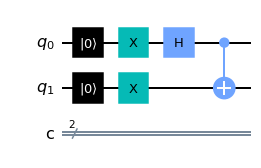

In [25]:
def psiminus():
    '''Function which returns circuit to create and measure psiminus = |01> - |10>'''
    qreg_q = QuantumRegister(2, 'q')
    creg_c = ClassicalRegister(2, 'c')
    circuit = QuantumCircuit(qreg_q, creg_c)

    circuit.reset(qreg_q[0])
    circuit.reset(qreg_q[1])
    circuit.x(qreg_q[0])
    circuit.h(qreg_q[0])
    circuit.x(qreg_q[1])
    circuit.cx(qreg_q[0], qreg_q[1])
#     circuit.measure(qreg_q,creg_c)
    return circuit
psiminus().draw('mpl')

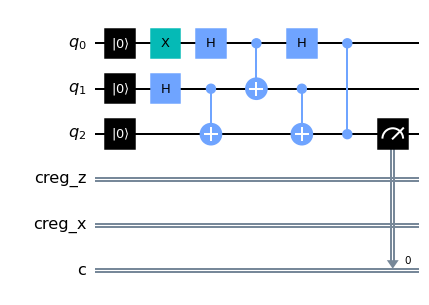

In [72]:
def teleportation(measure):
    '''Function which Generates Circuit to Demonstrate Quantum Teleportation'''
    qreg_q = QuantumRegister(3, 'q')
    creg_z = ClassicalRegister(1, name = "creg_z")
    creg_x = ClassicalRegister(1, name = "creg_x")
    creg = ClassicalRegister(1, 'c')
    circuit = QuantumCircuit(qreg_q, creg_z, creg_x, creg)

    # Reset all Qubits
    circuit.reset(qreg_q)
    
    # Set Qubit 0 to a random state (in this case, we use (|0> -|1>)/sqrt(2))
    circuit.x(qreg_q[0])
    circuit.h(qreg_q[0])
    
    # Create the Bell Pair
    circuit.h(qreg_q[1])
    circuit.cx(qreg_q[1], qreg_q[2])
    
    # Entangle Qubit 0 with Bell Pair
    circuit.cx(qreg_q[0],qreg_q[1])
    circuit.h(qreg_q[0])   
    # Measure Qubit 0 and Qubit 1
    if measure:
        circuit.cx(qreg_q[1],qreg_q[2])
        circuit.cz(qreg_q[0],qreg_q[2])
        circuit.measure(qreg_q[2],creg)
    else:
        circuit.measure(qreg_q[0],creg_z)
        circuit.measure(qreg_q[1],creg_x)

        # Conditionally Apply Gates on Qubit 2
        circuit.x(qreg_q[2]).c_if(creg_x,1)
        circuit.z(qreg_q[2]).c_if(creg_z,1)

    return circuit
teleportation(1).draw('mpl')

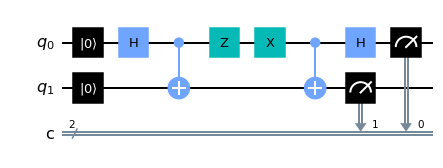

In [27]:
def superdense(msg):
    '''Function to create the circuit for superdense coding
        Parameters: 
        msg: A string with two bits, which determines the message to be sent'''
    qreg = QuantumRegister(2, 'q')
    creg = ClassicalRegister(2, 'c')
    circuit = QuantumCircuit(qreg, creg)

    # Reset all Qubits
    circuit.reset(qreg)
        
    # Create the Bell Pair
    circuit.h(qreg[0])
    circuit.cx(qreg[0], qreg[1])
    
    # Perform gates, as per the message
    if msg == "00":
        pass    # To send 00 we do nothing
    elif msg == "10":
        circuit.x(qreg[0]) # To send 10 we apply an X-gate
    elif msg == "01":
        circuit.z(qreg[0]) # To send 01 we apply a Z-gate
    elif msg == "11":
        circuit.z(qreg[0]) # To send 11, we apply a Z-gate
        circuit.x(qreg[0]) # followed by an X-gate

    # Decode the Message
    circuit.cx(qreg[0],qreg[1])
    circuit.h(qreg[0])

    # Measure both the qubits to get the message
    circuit.measure(qreg, creg)
    return circuit
superdense('11').draw('mpl')

In [28]:
def constant_oracle(qc,n):
    '''Function to add a constant oracle to a given quantum circuit
       The circuit has n input qubits and 1 output qubit, which makes it a n+1 qubit circuit'''
    # We choose a random number in {0,1} as the output of the oracle
    output = np.random.randint(2)
    if output == 1:
        qc.x(n)
    return qc
            

In [29]:
def balanced_oracle(qc,n):
    '''Function to add a balanced oracle to a given quantum circuit
   The circuit has n input qubits and 1 output qubit, which makes it a n+1 qubit circuit'''
    # We can add CNOTs from all the input qubits to the output qubit as target 
    # This creates a balanced oracle
    # We can also randomly add X gates to each of the inputs
    # This remains balanced
    xgate_str = ''
    # String which contains random bit string
    for i in range(n):
        xgate_str+=str(np.random.randint(2))
    # we apply an X-gate to that qubit:
    for i in range(n):
        if xgate_str[i] == '1':
            qc.x(i)
    # Performing CNOT gates
    for i in range(n):
        qc.cx(i, n)
    # Place the remaining X gates
    for i in range(n):
        if xgate_str[i] == '1':
            qc.x(i)
    return qc   

In [30]:
def deutsch(n, b_vs_c):
    '''Function to return a circuit which performs the 
    Deutsch Jozsa algorithm on n input qubits and 1 output qubit.
    The parameter b_vs_c indicates whether the circuit is balanced or constant'''
    qc = QuantumCircuit(n+1, n)
    # Set the output qubit to |->
    qc.x(n)
    qc.h(n)
    # Add Hadamards to all input qubits
    for i in range(n):
        qc.h(i)
    # The oracle is added, depending on the case we want to solve
    if b_vs_c == 'b':
        qc = balanced_oracle(qc,n)
    elif b_vs_c == 'c':
        qc = constant_oracle(qc,n)
    # Add Hadamards to all input qubits
    for i in range(n):
        qc.h(i)
    # Measure all the qubits
    for i in range(n):
        qc.measure(i, i)
    
    return qc

# Running Each Circuit for Output

## Creating Bell States

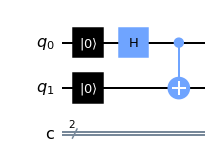

In [31]:
qc = phiplus()
qc.draw('mpl')

/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


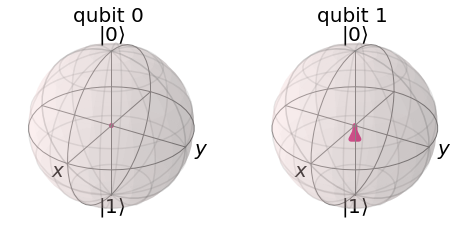

In [32]:
sim = Aer.get_backend('aer_simulator')
qc.save_statevector()
out_vector = sim.run(qc).result().get_statevector()
plot_bloch_multivector(out_vector)

## Quantum Teleportation

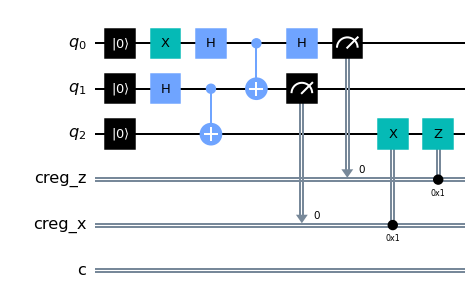

In [63]:
qc = teleportation(0)
qc.draw('mpl')

In [64]:
sim = Aer.get_backend('aer_simulator')
qc.save_statevector()
out_vector = sim.run(qc).result().get_statevector()
print(out_vector)

[-0.        +0.00000000e+00j  0.        +0.00000000e+00j
  0.70710678-8.65956056e-17j  0.        +0.00000000e+00j
  0.        +0.00000000e+00j  0.        +0.00000000e+00j
 -0.70710678+1.73191211e-16j  0.        +0.00000000e+00j]


/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


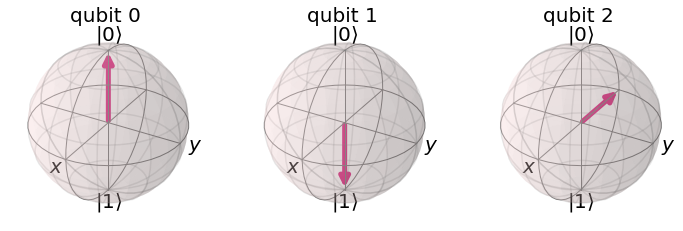

In [65]:
plot_bloch_multivector(out_vector)

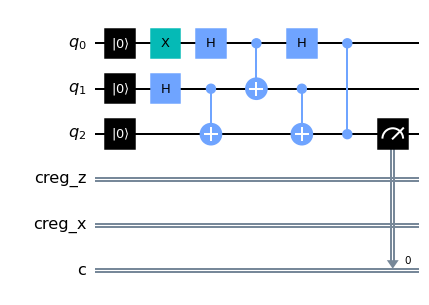

In [73]:
qc = teleportation(1)
qc.draw('mpl')

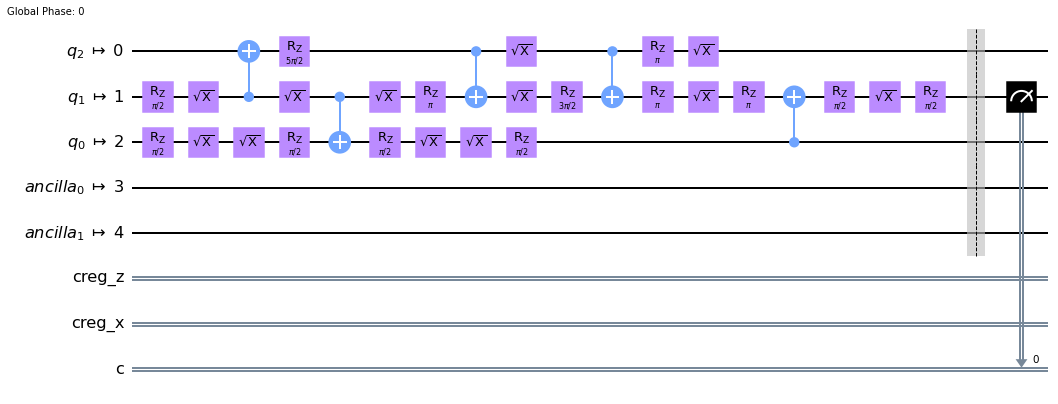

In [74]:
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
backend = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= 3 and
                                   not b.configuration().simulator and b.status().operational==True))
t_qc = transpile(qc, backend, optimization_level=3)
t_qc.draw('mpl')

In [75]:
job = backend.run(t_qc)
job_monitor(job)

Job Status: job has successfully run


{'0 0 0': 499, '1 0 0': 525}


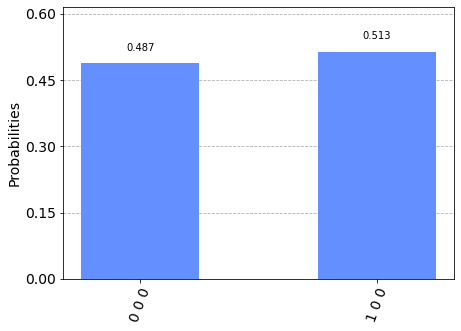

In [76]:
exp_result = job.result()
exp_counts = exp_result.get_counts(qc)
print(exp_counts)
plot_histogram(exp_counts)

## Superdense Coding

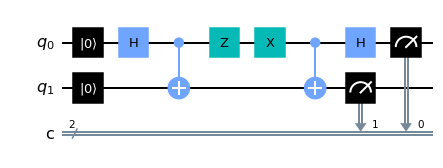

In [83]:
qc = superdense('11')
qc.draw('mpl')

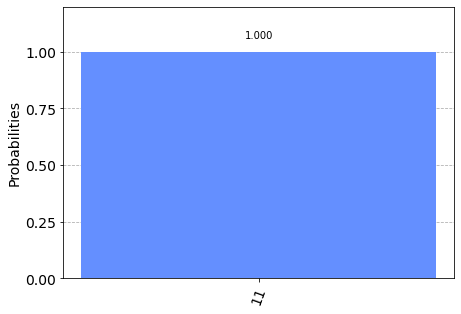

In [84]:
sim = Aer.get_backend('aer_simulator')
results = sim.run(qc).result()
hist = results.get_counts(qc)
plot_histogram(hist)

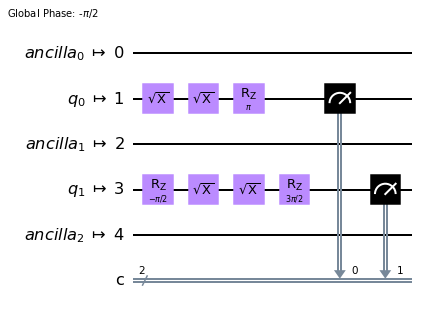

In [85]:
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
backend = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= 3 and
                                   not b.configuration().simulator and b.status().operational==True))
t_qc = transpile(qc, backend, optimization_level=3)
t_qc.draw('mpl')

In [86]:
job = backend.run(t_qc)
job_monitor(job)

Job Status: job has successfully run


{'00': 4, '01': 56, '10': 48, '11': 916}


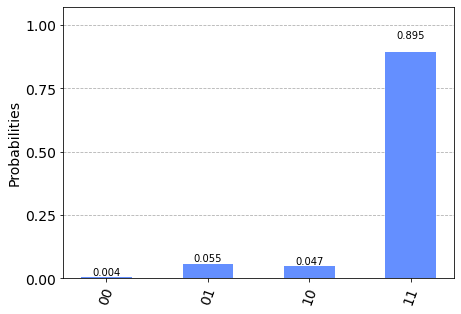

In [87]:
exp_result = job.result()
exp_counts = exp_result.get_counts(qc)
print(exp_counts)
plot_histogram(exp_counts)

## Deutsch - Josza Algorithm

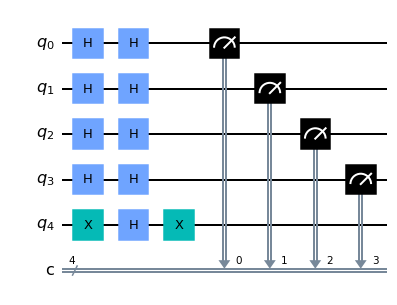

In [101]:
qc = deutsch(4,'c')
qc.draw('mpl')

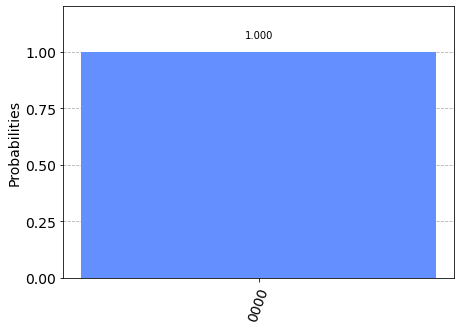

In [102]:
sim = Aer.get_backend('aer_simulator')
results = sim.run(qc).result()
hist = results.get_counts(qc)
plot_histogram(hist)

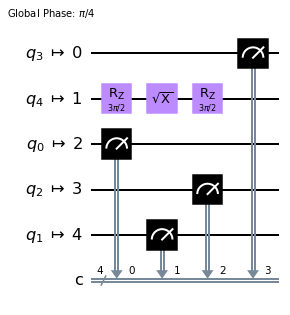

In [103]:
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
backend = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= 3 and
                                   not b.configuration().simulator and b.status().operational==True))
t_qc = transpile(qc, backend, optimization_level=3)
t_qc.draw('mpl')

In [104]:
job = backend.run(t_qc)
job_monitor(job)

Job Status: job has successfully run


{'0000': 964, '0001': 6, '0010': 44, '0100': 4, '1000': 6}


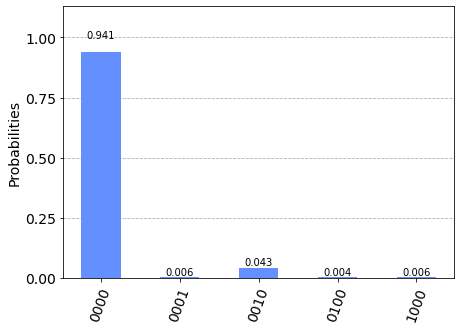

In [105]:
exp_result = job.result()
exp_counts = exp_result.get_counts(qc)
print(exp_counts)
plot_histogram(exp_counts)